Getting Started with Deep Learning using Keras and Python

Oriole Online Tutorial by Mike Williams,  May 2016

https://www.safaribooksonline.com/oriole/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

/Applications/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using Theano backend.


In [2]:
# Load dataset and inspect data
iris = pd.read_csv('/Users/karenyang/Desktop/iris.csv')
iris.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.2,I. setosa


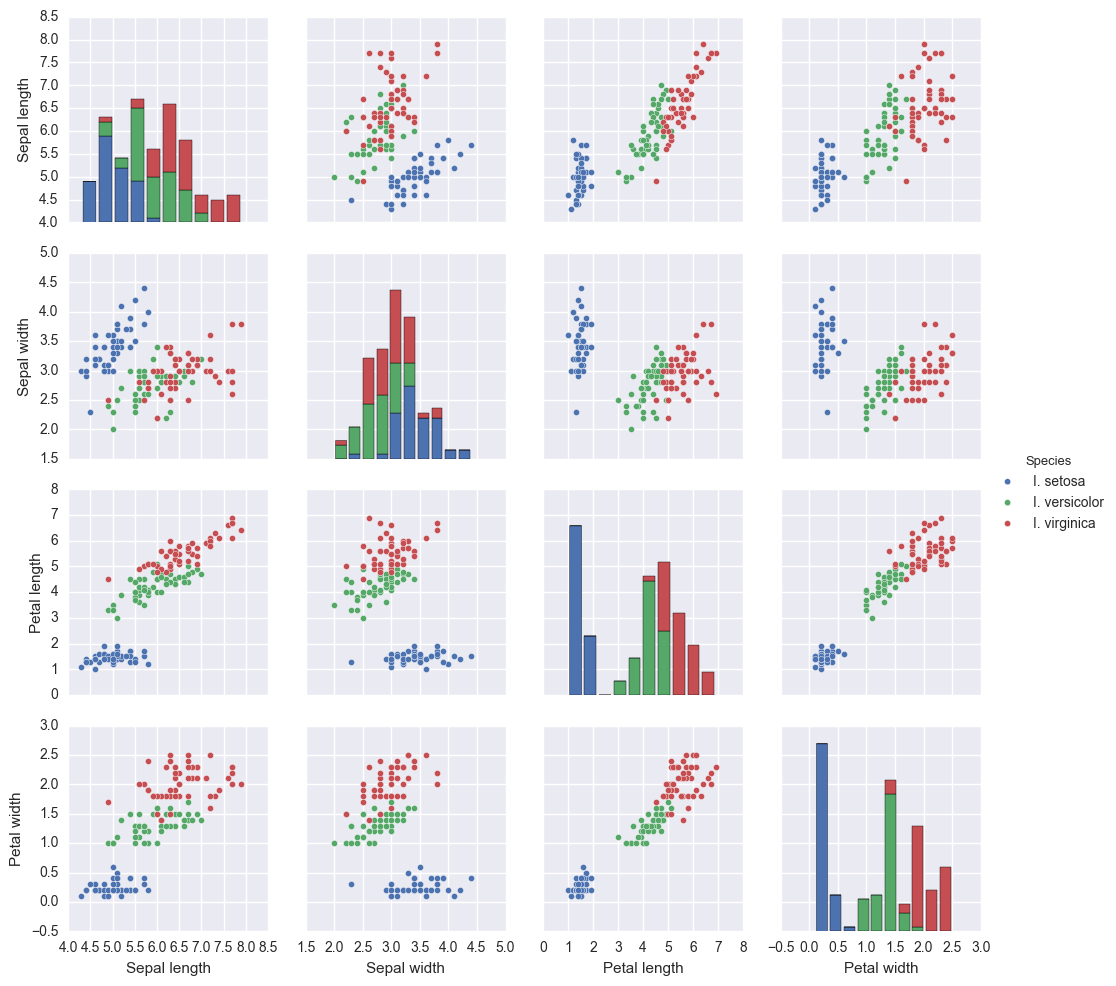

In [3]:
# Use seaborn
sns.pairplot(iris, hue='Species');

In [4]:
# Munge and split the data for training and testing
X = iris.values[:, :4] 
y = iris.values[:, 4]

In [5]:
# Use train_test_split() function from scikit-learn
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=0)

In [6]:
# Train a Scikit-learn classifier
# Use logistic regression classifier with built-in hyperparameter cross-validation
# Instantiate the classifier
lr = LogisticRegressionCV()
# Perform the .fit()
lr.fit(train_X, train_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [7]:
# Assess the Classifier Using Accuracy
# Measures the performance of the model, what fraction of the classifications are correct
print("Accuracy = {:.2f}".format(lr.score(test_X, test_y)))

Accuracy = 0.83



Keras is a high-level neural network library created by François Chollet 
at Google. The initial commit to its public GitHub repository was on 
March 27th last year.

In [8]:
# Now do the same thing with Keras.
# Data munging is done differently when doing neural networks with Keras
# Keras requires that labels (classifications) be one-hot encoded

In [9]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

 Inputs and outputs of neural networks.
 Input is the features of your data.
 Output is the classification (labels).
 4 features and 3 classes for iris dataset.
 4 units on input layer and 3 units on output layer.

We only have to define the hidden layers. We're only going to have one 
hidden layer for this project, and we'll give it 16 units. From the point 
of view of a GPU, 16 is a round number! You'll see a lot of powers of 2 
when you work with neural networks.

In [10]:
# Neural networks are defined in 2 ways.
# There are 2 choices: a sequential stack or a computational graph
# We will define our model as sequential stack of layers (specify layers one at a time)
model = Sequential()

In [11]:
# Define the size of the input layer, (input_shape=(4,)
# Define the size of the activation function of the hidden layer, 16 hidden units
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))

In [12]:
# Define the size and activation function of the output layer, 3 units
# Activation function is the transformation is the values that come out and go into the next layer
model.add(Dense(3)) 
model.add(Activation('softmax')) 
# output layer has to give output that are probabilities
# Softmax transforms the 3 outputs into values that are between 0 and 1 and add up to 1

In [13]:
# Specify the optimization strategy and the loss function to optimize. 
# Instruct the model to calculate accuracy as it works.
model.compile(optimizer='adam',  # for fitting model
              loss='categorical_crossentropy', # loss function adjust weights; 
              metrics=["accuracy"])

# for logistic regression, categorical_crossentropy is comparing 2 probability distributions 
# and making them as similar as possible

Using the Neural Network Classifier. Training neural networks often involves the concept of 
"mini-batching", which means showing the network a subset of the data, adjusting the weights, 
and then showing it another subset of the data. When the network has seen all the data once, 
that's called an "epoch". Tuning the mini-batch/epoch strategy is a somewhat problem-specific 
issue, but in this case we'll just use a mini-batch of 1. That makes it effectively good old 
stochastic gradient descent, i.e. the data is shown to the network one flower at a time, and 
the weights adjusted immediately.

We have an object whose API is almost identical to a classifier in 
scikit-learn. In particular, it has .fit() and .predict() methods. 
Let's fit.

In [14]:
# Feel free to rerun this cell with verbose=0 removed. Note that if you want 
# to experiment with the mini-batch/epoch strategy you should rerun the previous 
# cell that ran model.compile() to reinitialize the model weights. 
# (Note: this may take a few minutes to run, while fitting the model.)
model.fit(train_X, train_y_ohe, 
          nb_epoch=100, batch_size=1, verbose=0);

# theano is used as back-end

In [15]:
# Measure the performance
# In sci-kit learn, it is called "score"
# In keras, it is called "evaluate"

loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.99


In [16]:
# Neural network model does better than logistic regression
# One of the dangers of neural networks: overfitting
# You could work on that by adding dropout (which is built into Keras). 
# That's the neural network equivalent of the regularization our logistic 
# regression classifier uses.